In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import xarray as xr
import spatialproteomics as sp
import matplotlib.pyplot as plt
from glob import glob
from tqdm.auto import tqdm
import gc
import os
import seaborn as sns
from glob import glob
import matplotlib as mpl

# Load the custom style from your .ini file
mpl.style.core.use('pub_matplotlib_rc.ini')

ct_marker_dict = {'B cell': 'PAX5', 'T cell': 'CD3', 'Myeloid cell': 'CD11b', 'Dendritic cell': 'CD11c', 'Macrophage': 'CD68', 'Stromal cell': 'CD90', 'Stromal cell': 'Podoplanin', 'Endothelial cell': 'CD31', 'Endothelial cell': 'CD34'}
celltype_colors = {'B cell': '#5799d1', 'T cell': '#ebc850', 'Myeloid cell': '#de6866', 'Dendritic cell': '#4cbcbd', 'Macrophage': '#bb7cb4', 'Stromal cell': '#62b346', 'Endothelial cell': '#bf997d'}
marker_colors = {'PAX5': '#5799d1', 'CD3': '#ebc850', 'CD11b': '#de6866', 'CD11c': '#4cbcbd', 'CD68': '#bb7cb4', 'CD90': '#62b346', 'Podoplanin': '#62b346', 'CD31': '#bf997d', 'CD34': '#bf997d'}
markers = marker_colors.keys()

def box_center(box):
    x_center = (box[0][0] + box[0][1]) / 2
    y_center = (box[1][0] + box[1][1]) / 2
    return x_center, y_center

In [3]:
file_name = 'DLBCL_2.zarr'
xmin, xmax, ymin, ymax = 1000, 37000, 0, 25000

sample_id = file_name.replace('.zarr', '')
ds = xr.open_zarr(f'/g/huber/users/meyerben/data/codex/BNHL/data_for_publication/wsis/{file_name}').la.set_label_level('labels_0').pp[xmin:xmax, ymin:ymax]
font_size = 6.5
darkgray = '#49566d'

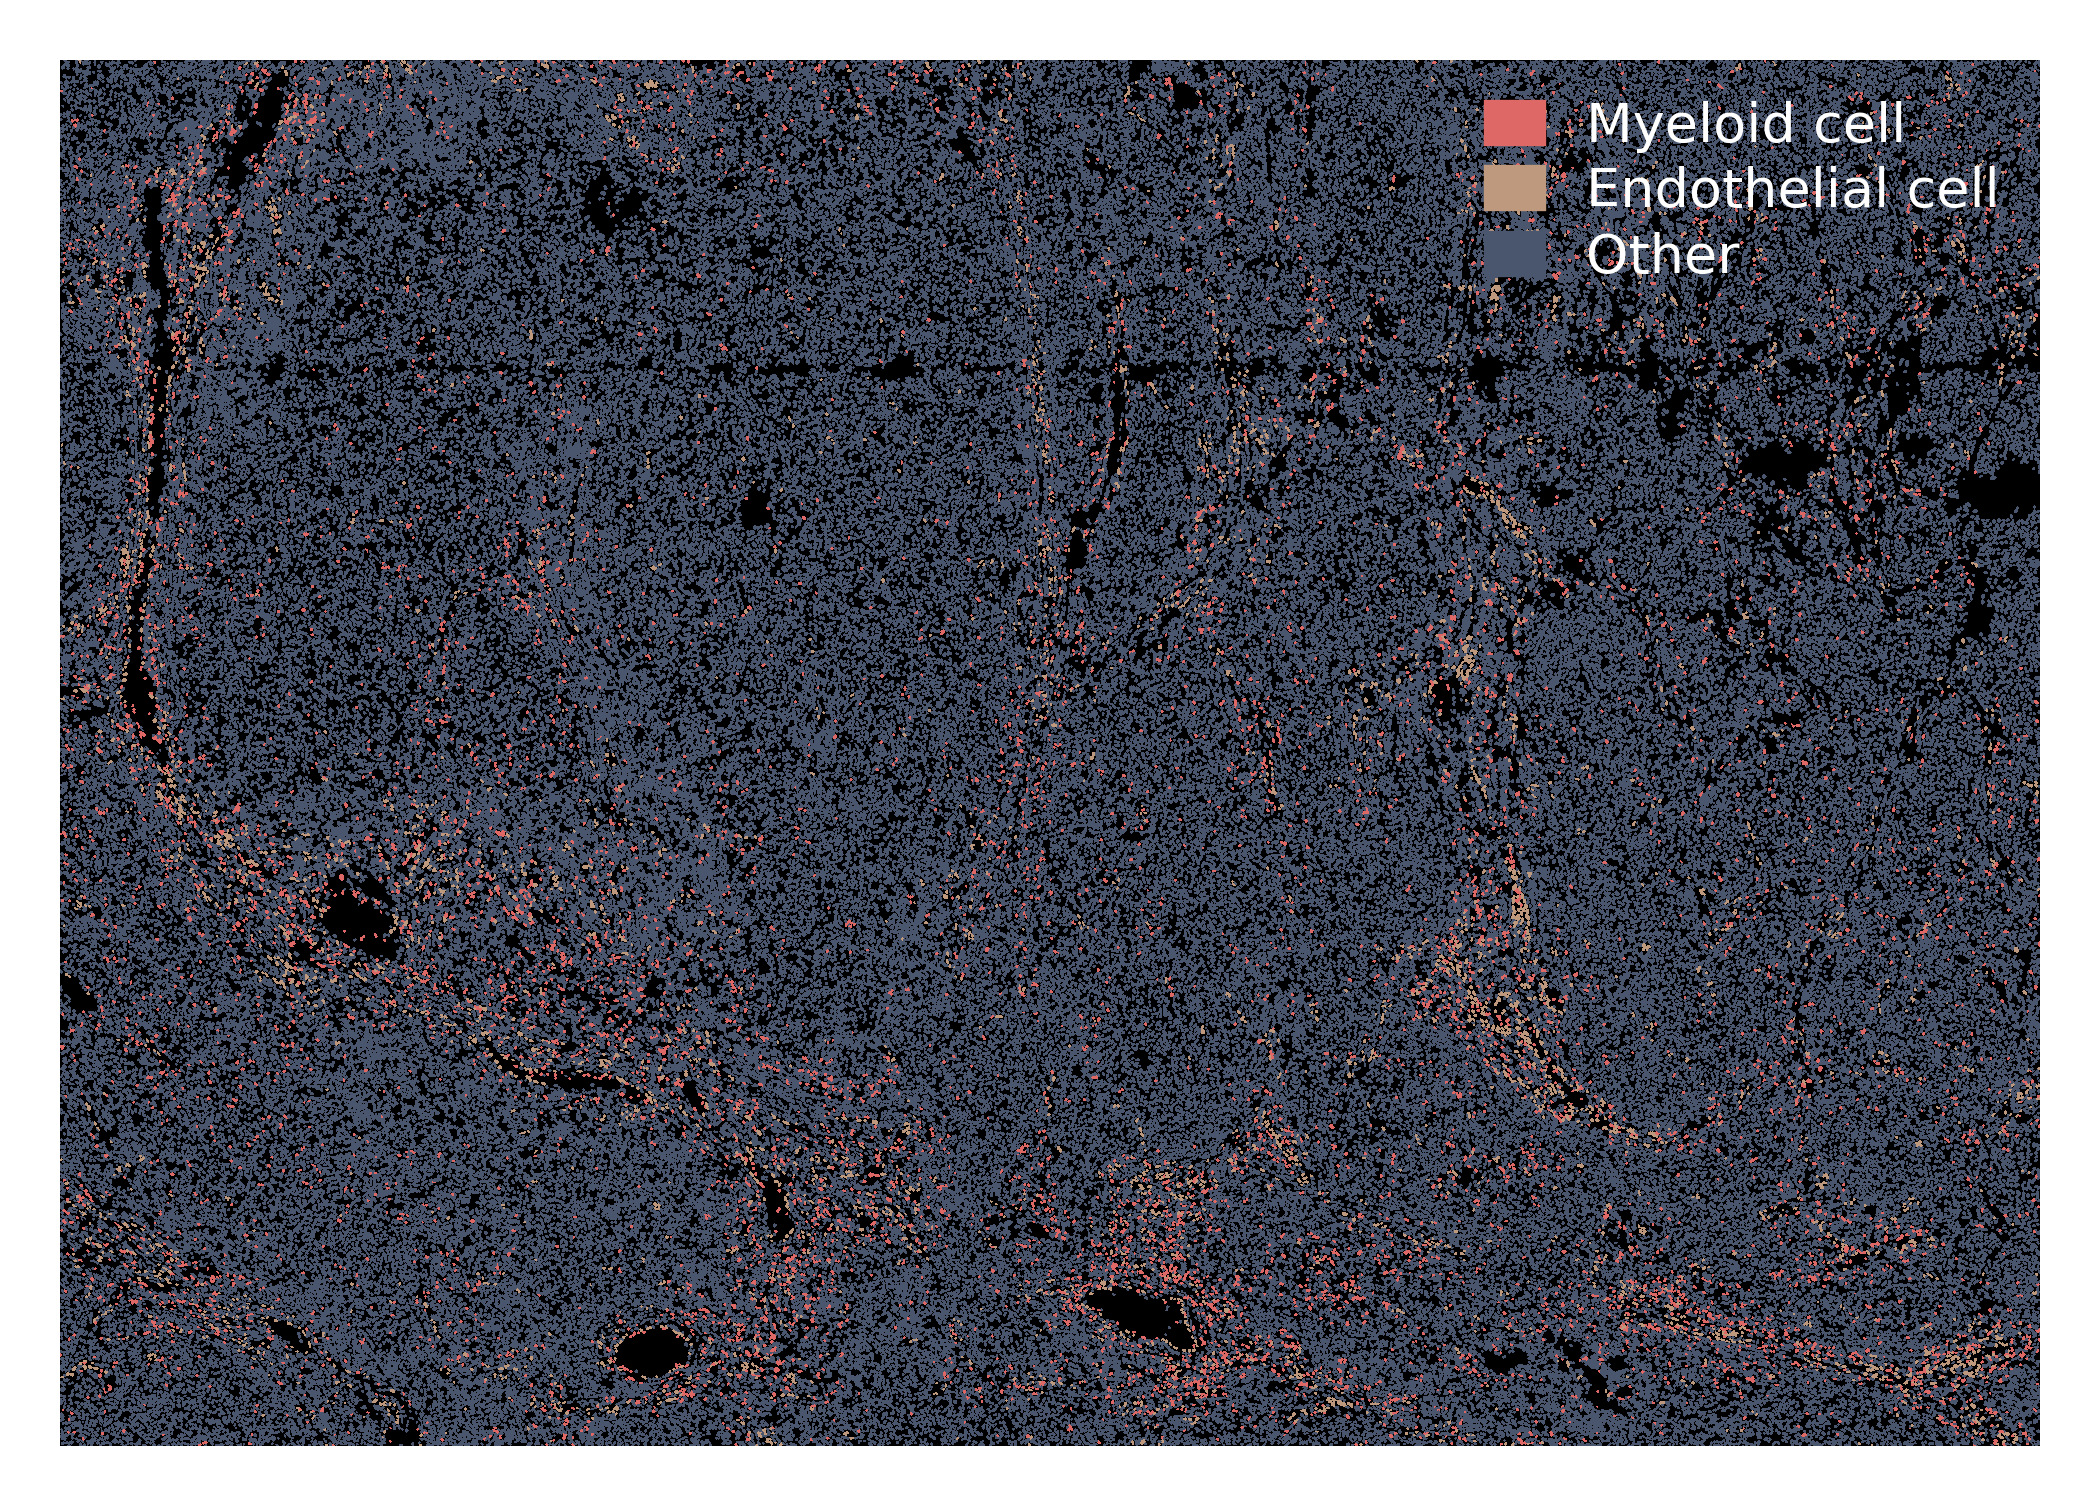

In [4]:
import matplotlib.patches as mpatches

# 10k * 7k
xmin, xmax, ymin, ymax = 15000, 25000, 9000, 16000
celltype_colors = {
    'B cell': darkgray, 'T cell': darkgray, 'Myeloid cell': '#de6866',
    'Dendritic cell': darkgray, 'Macrophage': darkgray, 
    'Stromal cell': darkgray, 'Endothelial cell': '#bf997d'
}

plt.figure(figsize=(4.28, 3), dpi=600)
_ = ds.pp[xmin:xmax, ymin:ymax].la.set_label_colors(
    celltype_colors.keys(), celltype_colors.values()
).pl.show(render_image=False, render_labels=True, legend_label=False)
plt.axis('off')

# Legend shenanigans - add after the plot
celltype_colors = {
    'Myeloid cell': '#de6866',
    'Endothelial cell': '#bf997d',
    'Other': darkgray
}

legend_handles = [mpatches.Rectangle((0, 0), 1, 1, color=color) for color in celltype_colors.values()]
plt.legend(
    handles=legend_handles, 
    labels=celltype_colors.keys(),
    fontsize=6.5, 
    labelcolor="white", 
    loc="upper right",  # Adjust position as needed
    frameon=False
)

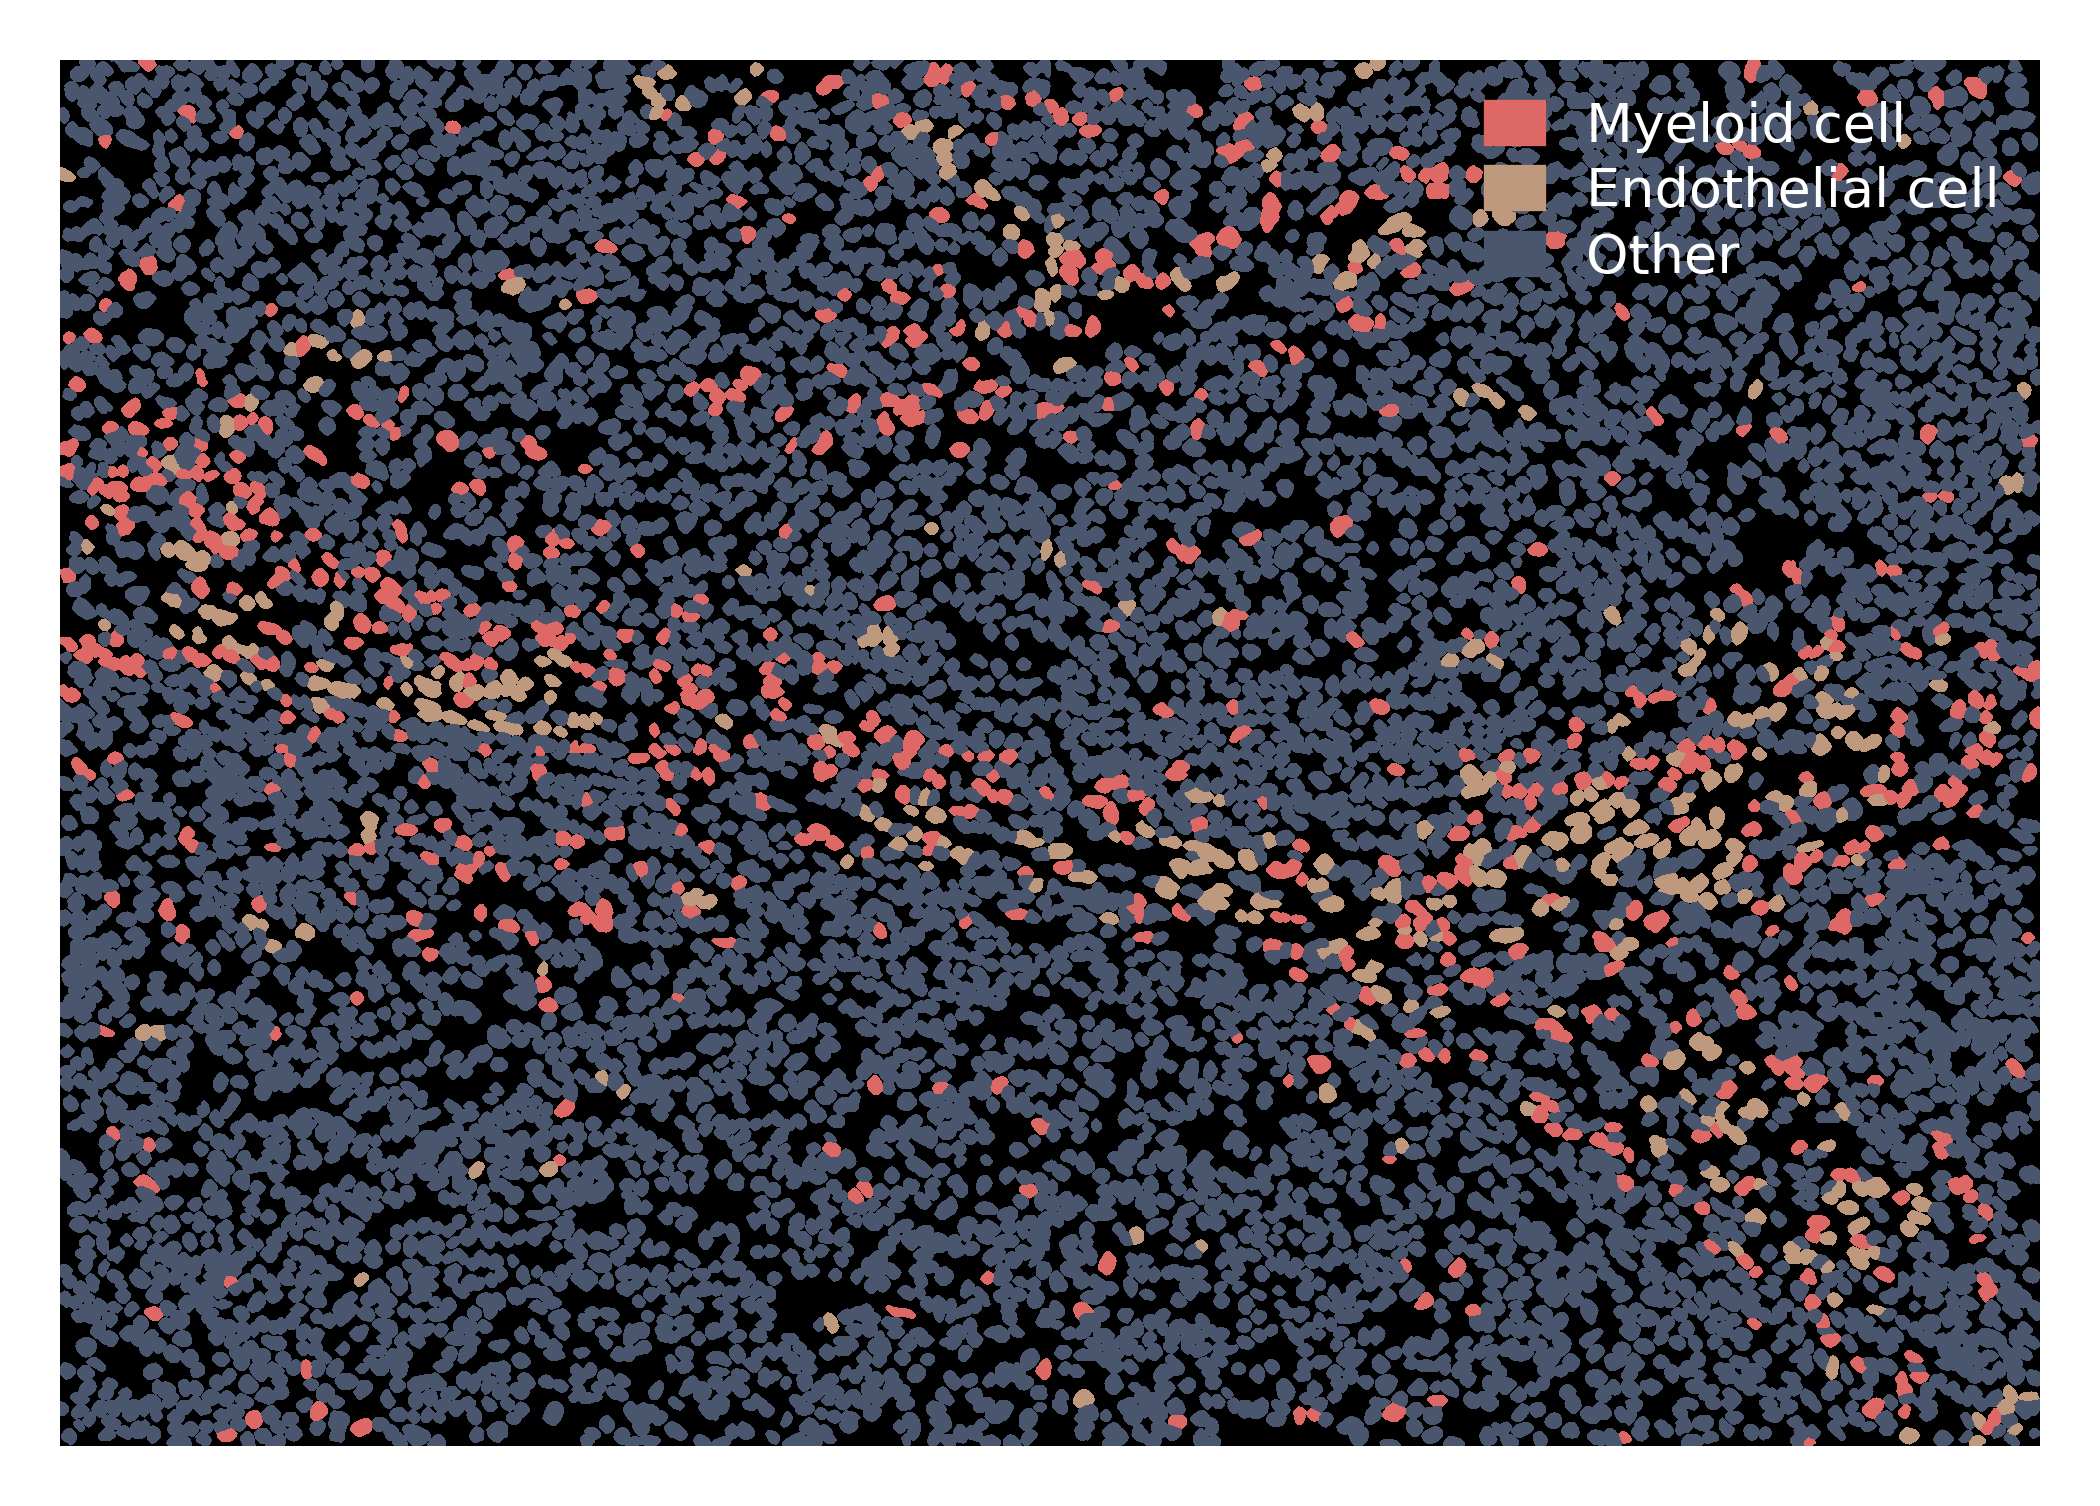

In [5]:
# 10k * 7k
xmin, xmax, ymin, ymax = 23000, 25000, 8800, 10200
celltype_colors = {
    'B cell': darkgray, 'T cell': darkgray, 'Myeloid cell': '#de6866',
    'Dendritic cell': darkgray, 'Macrophage': darkgray, 
    'Stromal cell': darkgray, 'Endothelial cell': '#bf997d'
}

plt.figure(figsize=(4.28, 3), dpi=600)
_ = ds.pp[xmin:xmax, ymin:ymax].la.set_label_colors(
    celltype_colors.keys(), celltype_colors.values()
).pl.show(render_image=False, render_labels=True, legend_label=False)
plt.axis('off')

# Legend shenanigans - add after the plot
celltype_colors = {
    'Myeloid cell': '#de6866',
    'Endothelial cell': '#bf997d',
    'Other': darkgray
}

legend_handles = [mpatches.Rectangle((0, 0), 1, 1, color=color) for color in celltype_colors.values()]
plt.legend(
    handles=legend_handles, 
    labels=celltype_colors.keys(),
    fontsize=6.5, 
    labelcolor="white", 
    loc="upper right",  # Adjust position as needed
    frameon=False
)